There are two variables when estimating the log evidence using thermodynamic integrtion:
* The number of MCMC steps per chain.
* The number of temperatures used to estimate the log evidence.

We now investigate how sensitive the log evidence estimation is with respect to these two variables.

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import pandas as pd
import corner
import time
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

from model_selection import Evidence_model_selection as EMS

In [9]:
Temps = [5,10,25,50,75,100,250]
Steps = [1E2,1E3,5E3,1E4]

lnZ = np.zeros((len(Temps),len(Steps)))
dlnZ = np.zeros((len(Temps),len(Steps)))

In [3]:
# Set up the experiment
nTruth = 2
nMoment = 1
param_Truth = [ 5.0,1.5, 0.75, -0.75]
# Initialize the model selection object
Ex1 = EMS(nTruth,nMoment,param_Truth)
# Run a synthetic experiment and generate data, the data becomes an attribute of the object
Ex1.get_data()

In [ ]:
for kk,ntemps in enumerate(Temps):
    for jj,MCMC_steps in enumerate(Steps):
        Ex1.ntemps = ntemps
        sampler = Ex1.run_MCMC(nTerms = nTruth, MCMC_Steps=int(MCMC_steps))
        lnZ[kk,jj],dlnZ[kk,jj] = sampler.thermodynamic_integration_log_evidence()

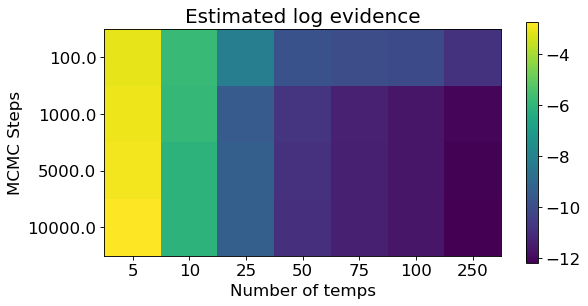

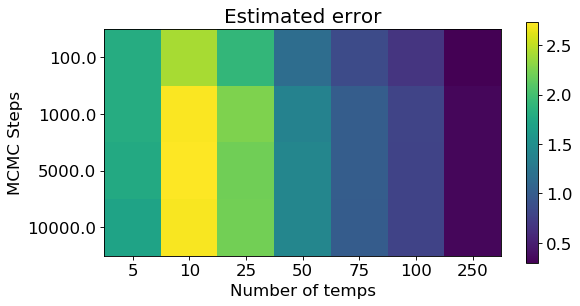

In [18]:
plt.imshow(lnZ.T)
plt.xticks(np.arange(len(Temps)),Temps)
plt.xlabel('Number of temps')
plt.yticks(np.arange(len(Steps)),Steps)
plt.ylabel('MCMC Steps')
plt.colorbar()
plt.title('Estimated log evidence')
plt.show()

plt.imshow(dlnZ.T)
plt.xticks(np.arange(len(Temps)),Temps)
plt.xlabel('Number of temps')
plt.yticks(np.arange(len(Steps)),Steps)
plt.ylabel('MCMC Steps')
plt.title('Estimated error')
plt.colorbar()
plt.show()

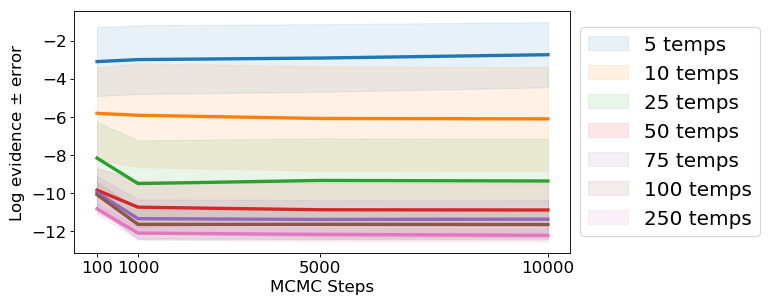

In [19]:
for kk,ntemps in enumerate(Temps):
    plt.fill_between(Steps,lnZ[kk,:]-dlnZ[kk,:],lnZ[kk,:]+dlnZ[kk,:],label=str(ntemps)+' temps',color = 'C'+str(kk),alpha=0.1)
    plt.plot(Steps,lnZ[kk,:],color = 'C'+str(kk),linewidth = 3)
plt.xlabel('MCMC Steps')
plt.ylabel('Log evidence $\pm$ error')
plt.xticks(Steps)
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

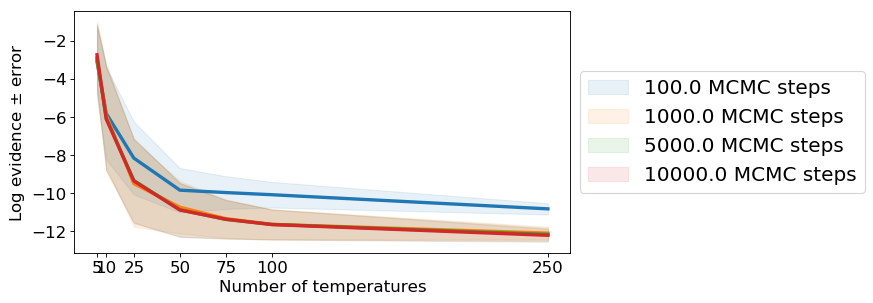

In [20]:
for jj,MCMC_steps in enumerate(Steps):
    plt.fill_between(Temps,lnZ[:,jj]-dlnZ[:,jj],lnZ[:,jj]+dlnZ[:,jj],label=str(MCMC_steps)+' MCMC steps',color = 'C'+str(jj),alpha=0.1)
    plt.plot(Temps,lnZ[:,jj],color = 'C'+str(jj),linewidth = 3)
plt.xlabel('Number of temperatures')
plt.ylabel('Log evidence $\pm$ error')
plt.xticks(Temps)
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()